In [1]:
import os
import sys
directory_path = os.path.abspath(os.path.join('..'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

import numpy as np
from data import Dataset

DATA_DIR = "../data/Problem_01"
RESULT_DIR = "../results/Problem_01"

dataset = Dataset(DATA_DIR, RESULT_DIR, fps=5)

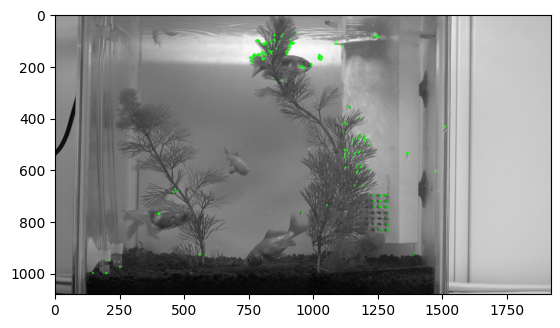

In [2]:
import cv2
import matplotlib.pyplot as plt

imgs = dataset.get_images([0, 1, 2])

# ax1 = plt.subplot(1,2,1)
# ax2 = plt.subplot(1, 2, 2)
# ax1.imshow(imgs[0])
# ax2.imshow(imgs[1])

# グレースケールにしてコーナ特徴点を抽出
prev_frame = imgs[0]
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_RGB2GRAY)

orb = cv2.ORB_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(prev_gray,None)
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.

img2 = cv2.drawKeypoints(prev_gray, kp1, None, color=(0,255,0), flags=0)
plt.imshow(img2)

# Detection (By Takenobu 2022/09/16)

In [3]:
from mmdet.apis import init_detector, inference_detector
import sys
# Path追加
sys.path.append('../')
from common.visulaizations import draw_bb
import cv2
import imageio
import matplotlib.pyplot as plt

load checkpoint from local path: /home/workspace/kiyama/SummerCamp2022/work_dirs/faster_rcnn_r50_fpn/latest.pth


/tmp/ipykernel_225096/1403483067.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('/home/workspace/kiyama/SummerCamp2022/data/train/images/frame_000106.PNG')
/home/workspace/kiyama/SummerCamp_2022_personal/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
/root/miniconda3/envs/openmmlab/lib/python3.8/site-packages/torchvision/utils.py:215: UserWarning: boxes doesn't contain any box. No box was drawn
  warnings.warn("boxes doesn't contain any box. No box was drawn")


True

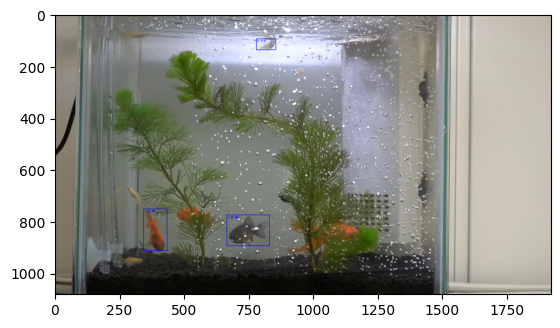

In [4]:

model = init_detector('/home/workspace/kiyama/SummerCamp2022/configs/faster_rcnn_r50_fpn.py', '/home/workspace/kiyama/SummerCamp2022/work_dirs/faster_rcnn_r50_fpn/latest.pth', device="cuda:1")
result_dir = '/home/workspace/kiyama/SummerCamp2022/notebooks'
score_th = 0.5
img = imageio.imread('/home/workspace/kiyama/SummerCamp2022/data/train/images/frame_000106.PNG')
result = inference_detector(model, img)
# print(result)
#plt.imshow(img)
det_img = draw_bb(img, result, score_th)
det_img2 = cv2.cvtColor(det_img, cv2.COLOR_BGR2RGB)
plt.imshow(det_img2)
cv2.imwrite('/home/workspace/kiyama/SummerCamp2022/notebooks/test.png',det_img)

In [5]:
# Check the result format
from pprint import pprint 
# pprint(type(result[0]))
pprint(result[0])

array([[7.7764655e+02, 9.5044762e+01, 8.5376746e+02, 1.3811713e+02,
        9.5345700e-01],
       [2.8128137e+02, 6.7282550e+02, 3.1622403e+02, 7.2185077e+02,
        6.5036595e-02]], dtype=float32)


# Try to make Object Tracking

In [7]:
# path to vidio
video_path = '/home/workspace/kiyama/SummerCamp2022/data/Problem_01/Problem_01.MP4'

cap = cv2.VideoCapture(video_path)

c = 0
while True:
    # each of roop is category of fish
    for category in result:
        for detected in category:
            x, y, x_w, y_h, score = detected[0:5]

    c+= 1
    if c==9:
        break

    print(x,y,x_w,y_h,score)


cap.release()


341.36246 751.88525 433.19293 913.8011 0.99762136
341.36246 751.88525 433.19293 913.8011 0.99762136
341.36246 751.88525 433.19293 913.8011 0.99762136
341.36246 751.88525 433.19293 913.8011 0.99762136
341.36246 751.88525 433.19293 913.8011 0.99762136
341.36246 751.88525 433.19293 913.8011 0.99762136
341.36246 751.88525 433.19293 913.8011 0.99762136
341.36246 751.88525 433.19293 913.8011 0.99762136


In [ ]:
tracker = EuclideanDistTracker()

